## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

#### Aula 01 - Introdução ao Aprendizado de Máquinas

##### Aula 01 - Introdução aos problemas de aprendizado de máquinas

In [2]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns

print('Setup completo!')

Setup completo!


Na primeira aula da disciplina Aprendizado de Máquina foi apresentado as etapas de construção de um modelo de Machine Learning:

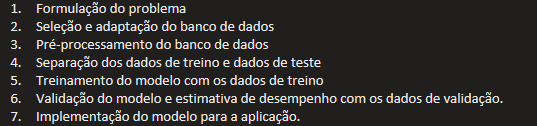

1. Formulação do problema

O desenvolvimento do nosso aprendizado de máquina tem como principal pergunta de négocio a estimação do valor médio de uma residência no estado da Califórnia, nos EUA.
Usaremos como fonte de dados um conjunto com as caracrteristicas das residências deste distrito.

Fonte: https://www.kaggle.com/datasets/camnugent/california-housing-prices/download?datasetVersionNumber=1 

Glossário do banco de dados:

* longitude: Longitude
* latitude: Latitude
* house_median_age: Idade média do imóvel
* total_room: Quantidade total de comôdos no quarteirão
* total_bedrooms: Quantidade total de quartos no quarteirão
* population: Quantidade de pessoas no quateirão
* households: Quantidade de moradias no quateirão
* median_income: Mediana dos rendimentos totais das famílias no quateirão (USD), mede o nível socioeconômico e a capacidade de compra das famílias daquela região
* median_house_value: Mediana do valor das casas no quarteirão
* ocean_proximity: Indice de distância aproximada do oceano near-ocean (próximo ao oceano), near-bay (próximo à baía), island (ilha), inland (interior) e near-lakes (próximo a lagos)

2. Seleção e adaptação do banco de dados

In [3]:
path = r'C:\Users\ninam\Documents\Projetos\UFV\UFV\src\housing.csv'

df_housing = pd.read_csv(path)

In [4]:
df_housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


##### Aula 02 -  Tipos de dados e tratamento de entradas

#### Tipos de dados: 
1. Qualitativos
 * Nominal 
 * Ordinários

2. Quantitativos
 * Discreto
 * Contínuo

In [5]:
# Explorando o banco de dados
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Verificar informações das variáveis
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Conseguimos interpretar a partir do último comando que a variável total_bedrooms tem 207 valores ausentes e a única variavel categórica é a ocean_proximity

In [8]:
# Quais são as opções dentro da nossa variável categórica?
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# Quais as cinco locações que estão numa ilha?
df_housing.loc[df_housing['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [11]:
# Destas casas que estão na ilha quais as que tem mais de 30 anos
df_housing.loc[(df_housing['ocean_proximity'] == 'ISLAND')&(df_housing['housing_median_age'] > 30)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND


#### Ferramentas para exploração de dados:

##### 1. Ferramentas descritivas
  * Medidas de tendências
    * Média
    * Mediana
    * Moda
 * Medidas de dispersão
    * Intervalo
    * Desvio padrão
 * Distribuição das frequências
 * Histogramas

In [12]:
# Medidas de tendência e dispersão
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


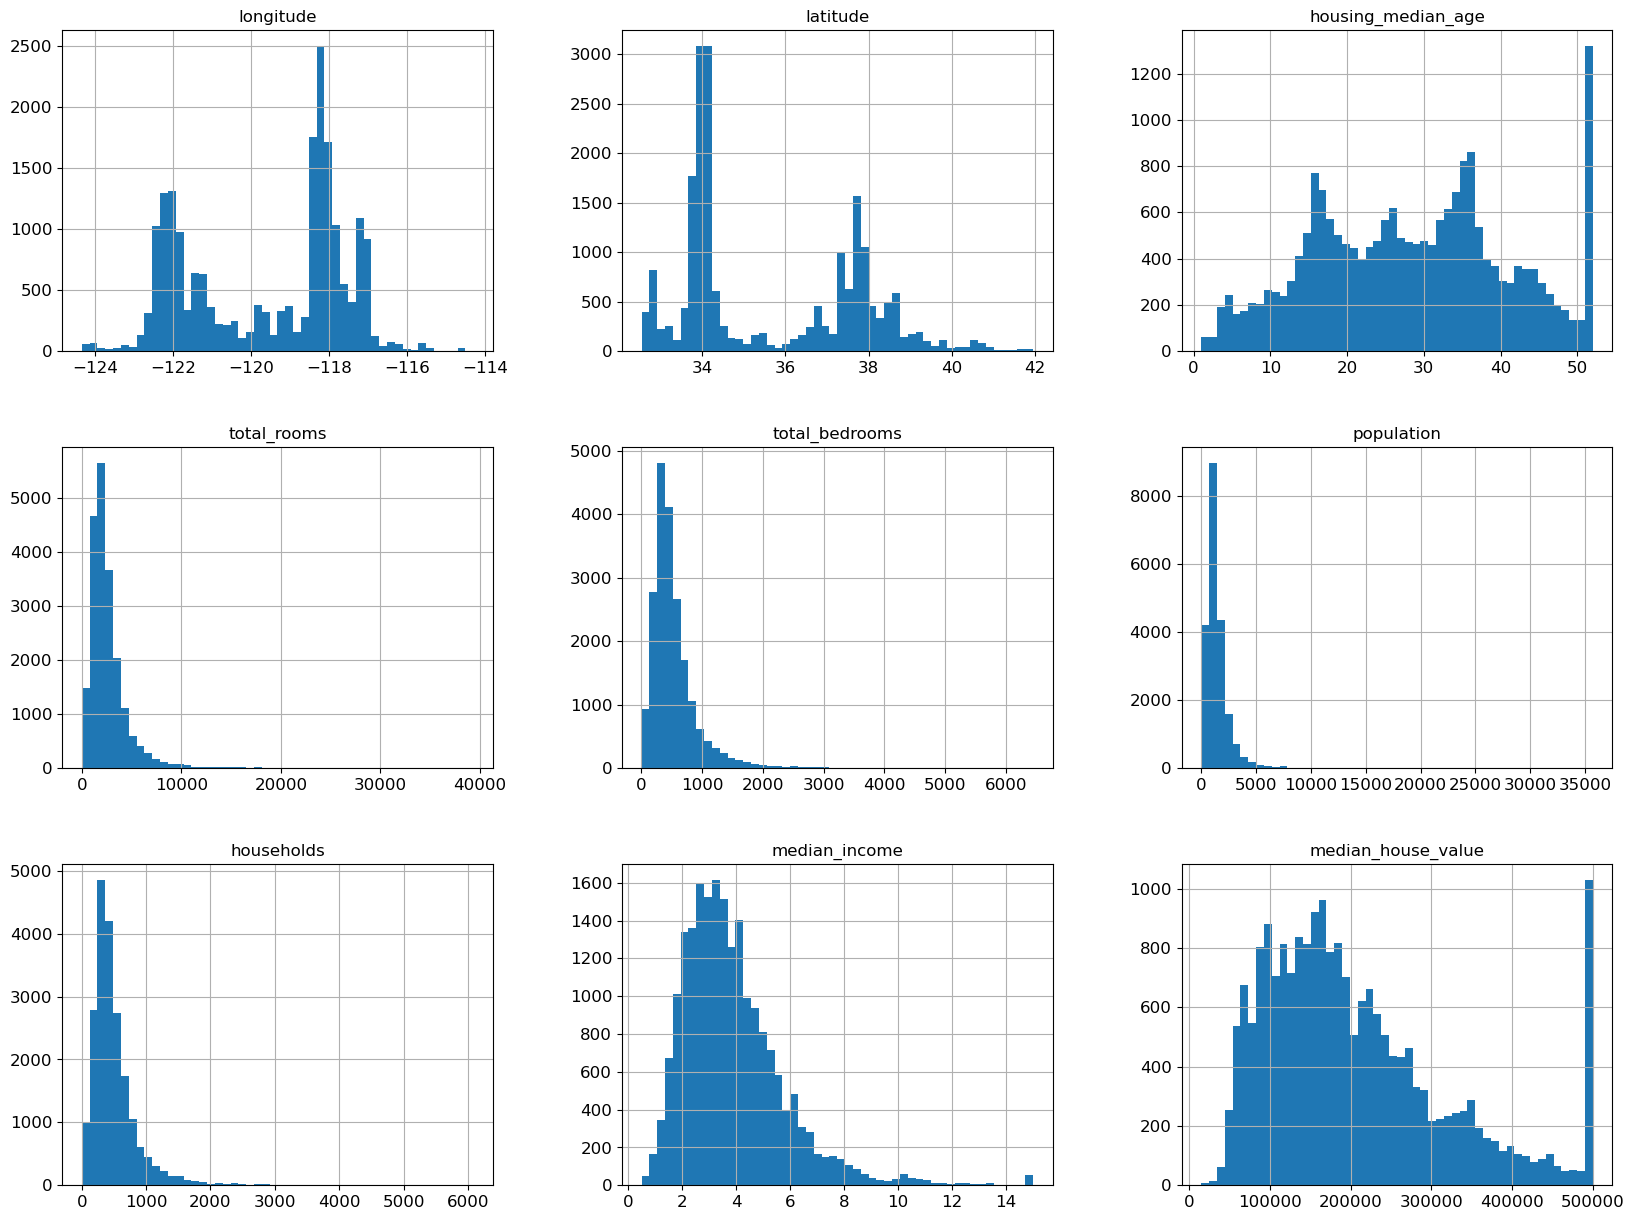

In [13]:
# Distribuição de frequências
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

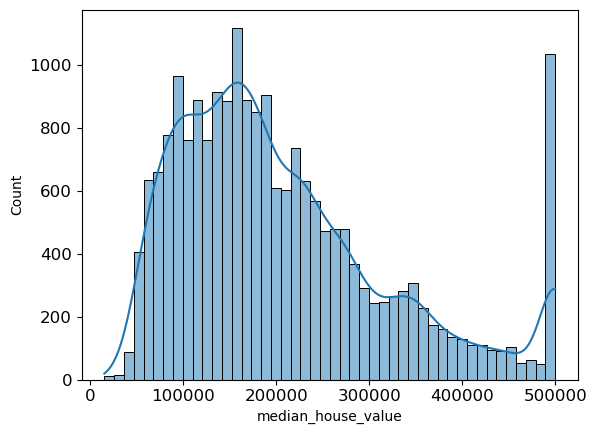

In [14]:
sns.histplot(data=df_housing, x='median_house_value',kde=True)

<Axes: xlabel='median_house_value', ylabel='Count'>

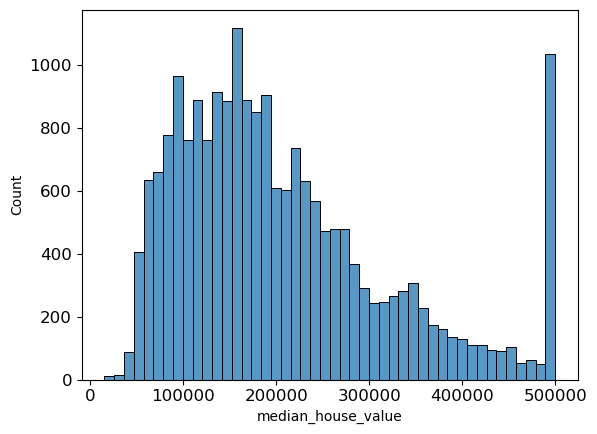

In [15]:
sns.histplot(data=df_housing, x='median_house_value',kde=False)


##### 2. Ferramentas de inferência
 * Teste de hipótese
 * Análise da variância (ANOVA)
 * Teste de chi-quadrado
 * Regressão linear
 
 ---